#**Preprocesamiento de la base de datos Air Quality Prediction**

El siguiente archivo contiene el preprocesamiento de la base de datos Air Quality Prediction. Esta consta de los siguientes pasos:



1.   Eliminar outliers
2.   Imputar datos NA.
3.   Caracterizar la base de datos.
4.   Normalizar datos.
5.   Separar en datos de entrenamiento y de prueba.
6.   Preparar datos para realizar aprendizaje supervizado.

Especificamente en este archivo se realiza el paso 1 y 2.

##1 Eliminar outliers

Gracias a las dos iteraciones del EDA realizado, fue posible eliminar los outliers de la varible objetivo y además se identificó que las variables de entrada no tenian outliers. De esta manera, es posible pasar directamente a la imputación de datos NA.

## 2 Imputar datos NA

Esta parte del proceso se realiza en dos pasos, primero se insertan las filas faltantes de cada fragmento, para posteriormente imputar los datos con valores perdidos.

In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ls

Cook/            filterData3.csv    SiteLocations_with_more_sites.csv
filterData1.csv  sample_code.r      SubmissionZerosExceptNAs.csv
filterData2.csv  SiteLocations.csv  TrainingData.csv


In [ ]:
ls gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/Data_AQP/

ls: cannot access 'gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/Data_AQP/': No such file or directory


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/Data_AQP/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/Data_AQP


In [3]:
ls

best_model.h5    SiteLocations.csv                  testYDF.csv
Cook/            SiteLocations_with_more_sites.csv  trainDF.csv
filterData1.csv  SubmissionZerosExceptNAs.csv       TrainingData.csv
filterData2.csv  testDF.csv                         trainScaledDF.csv
filterData3.csv  testScaledDF.csv                   trainXDF.csv
sample_code.r    testXDF.csv                        trainYDF.csv


In [ ]:
import pandas as pd
dataFilter2 = pd.read_csv('filterData2.csv', header=0)
dataFilter2.head()

chunkID  position_within_chunk  ...  Sample.Min.Baro.Pressure_6005  target_4_1601
0        1                      1  ...                            NaN       0.184045
1        1                      2  ...                            NaN       0.184045
2        1                      3  ...                            NaN       0.184045
3        1                      4  ...                            NaN       0.184045
4        1                      5  ...                            NaN       0.184045

[5 rows x 46 columns]

In [ ]:
dataFilter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37619 entries, 0 to 37618
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   chunkID                        37619 non-null  int64  
 1   position_within_chunk          37619 non-null  int64  
 2   month_most_common              37619 non-null  int64  
 3   weekday                        37619 non-null  int64  
 4   hour                           37619 non-null  int64  
 5   Solar.radiation_64             37193 non-null  float64
 6   WindDirection..Resultant_1     36189 non-null  float64
 7   WindDirection..Resultant_1018  9728 non-null   float64
 8   WindSpeed..Resultant_1         36189 non-null  float64
 9   WindSpeed..Resultant_1018      9728 non-null   float64
 10  Ambient.Max.Temperature_50     12238 non-null  float64
 11  Ambient.Max.Temperature_52     36330 non-null  float64
 12  Ambient.Max.Temperature_57     11776 non-null 

In [ ]:
dataToWork = dataFilter2.iloc[:,:]
dataToWork.head()

chunkID  position_within_chunk  ...  Sample.Min.Baro.Pressure_6005  target_4_1601
0        1                      1  ...                            NaN       0.184045
1        1                      2  ...                            NaN       0.184045
2        1                      3  ...                            NaN       0.184045
3        1                      4  ...                            NaN       0.184045
4        1                      5  ...                            NaN       0.184045

[5 rows x 46 columns]

Primero se imputan las filas faltantes

In [ ]:
import numpy as np

#Primero se crea un vector de enteros con los valores de 1 a 192
posicionesMedicion = range(1,193)
idFila = 0

name_columns = dataToWork.columns
name_columns = name_columns.to_numpy()


#Se crea un dataframe en que se imputaran las filas perdidas
newDf = pd.DataFrame()


#Se va a iterar para cada fragmento de datos y para cada posicion necesaria
values = dataToWork.values
chunk_ids = np.unique(values[:, 0])
for chunk_id in chunk_ids:
  for posicion in posicionesMedicion:
    row = dataToWork.loc[(dataToWork['chunkID'] == chunk_id) & (dataToWork['position_within_chunk'] == posicion)]
    if row.empty:
      rowToWrite = [chunk_id,posicion] + [np.nan for _ in range(44)]
      rowToWrite = np.array(rowToWrite)
      rowToWrite = rowToWrite.reshape(1,46)
      rowToWriteDataframe = pd.DataFrame(rowToWrite, columns = name_columns, index=[0])
      newDf = newDf.append(rowToWriteDataframe, ignore_index = True)
      #print("agregue una fila con chunkid = " + str(chunk_id) + ", con posicion: " + str(posicion) + "y con idFila = " + str(idFila) )
    else:
      newDf = newDf.append(row, ignore_index = True)

In [ ]:
newDf.head()

chunkID  position_within_chunk  ...  Sample.Min.Baro.Pressure_6005  target_4_1601
0      1.0                    1.0  ...                            NaN       0.184045
1      1.0                    2.0  ...                            NaN       0.184045
2      1.0                    3.0  ...                            NaN       0.184045
3      1.0                    4.0  ...                            NaN       0.184045
4      1.0                    5.0  ...                            NaN       0.184045

[5 rows x 46 columns]

In [ ]:
newDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39360 entries, 0 to 39359
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   chunkID                        39360 non-null  float64
 1   position_within_chunk          39360 non-null  float64
 2   month_most_common              37619 non-null  float64
 3   weekday                        37619 non-null  float64
 4   hour                           37619 non-null  float64
 5   Solar.radiation_64             37193 non-null  float64
 6   WindDirection..Resultant_1     36189 non-null  float64
 7   WindDirection..Resultant_1018  9728 non-null   float64
 8   WindSpeed..Resultant_1         36189 non-null  float64
 9   WindSpeed..Resultant_1018      9728 non-null   float64
 10  Ambient.Max.Temperature_50     12238 non-null  float64
 11  Ambient.Max.Temperature_52     36330 non-null  float64
 12  Ambient.Max.Temperature_57     11776 non-null 

Una vez agregadas las filas faltantes, es necesario rellenar los datos de "month_most_common", "weekday" y "hour". 

Primero se rellenan los valores de "month_most_common", ya que solo se debe identificar la primera observación que no sea NAN y repetir el valor para todos las filas de ese fragmento.

In [ ]:
dataToWork = newDf.iloc[:,:]
dataToWork.iloc[300:320,:]

chunkID  ...  target_4_1601
300      2.0  ...       0.276067
301      2.0  ...       0.552134
302      2.0  ...       0.368089
303      2.0  ...       0.184045
304      2.0  ...       0.184045
305      2.0  ...       0.184045
306      2.0  ...       0.092022
307      2.0  ...       0.092022
308      2.0  ...       0.092022
309      2.0  ...       0.092022
310      2.0  ...            NaN
311      2.0  ...            NaN
312      2.0  ...            NaN
313      2.0  ...            NaN
314      2.0  ...            NaN
315      2.0  ...            NaN
316      2.0  ...            NaN
317      2.0  ...            NaN
318      2.0  ...            NaN
319      2.0  ...            NaN

[20 rows x 46 columns]

In [ ]:
name_columns = dataToWork.columns
name_columns = name_columns.to_numpy()


#Se crea un dataframe en que se imputaran las filas perdidas
newDf = pd.DataFrame()

def obtenerMesFragmento(rows):
  for index, row in rows.iterrows():
    mes = row["month_most_common"]
    if not np.isnan(mes):
      return mes


#Se va a iterar para cada fragmento de datos y para cada posicion necesaria
values = dataToWork.values
chunk_ids = np.unique(values[:, 0])
iterAux = 0
for chunk_id in chunk_ids:
  rows = dataToWork.loc[(dataToWork['chunkID'] == chunk_id)]
  mesFragmento = obtenerMesFragmento(rows)
  for index, row in rows.iterrows():
    mes = row["month_most_common"]
    if np.isnan(mes):
      posicion = row["position_within_chunk"]
      dataToWork.loc[(dataToWork['chunkID'] == chunk_id) & (dataToWork['position_within_chunk'] == posicion), 'month_most_common'] = mesFragmento

In [ ]:
dataToWork.iloc[300:320,:]

chunkID  ...  target_4_1601
300      2.0  ...       0.276067
301      2.0  ...       0.552134
302      2.0  ...       0.368089
303      2.0  ...       0.184045
304      2.0  ...       0.184045
305      2.0  ...       0.184045
306      2.0  ...       0.092022
307      2.0  ...       0.092022
308      2.0  ...       0.092022
309      2.0  ...       0.092022
310      2.0  ...            NaN
311      2.0  ...            NaN
312      2.0  ...            NaN
313      2.0  ...            NaN
314      2.0  ...            NaN
315      2.0  ...            NaN
316      2.0  ...            NaN
317      2.0  ...            NaN
318      2.0  ...            NaN
319      2.0  ...            NaN

[20 rows x 46 columns]

In [ ]:
dataToWork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39360 entries, 0 to 39359
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   chunkID                        39360 non-null  float64
 1   position_within_chunk          39360 non-null  float64
 2   month_most_common              39360 non-null  float64
 3   weekday                        37619 non-null  float64
 4   hour                           37619 non-null  float64
 5   Solar.radiation_64             37193 non-null  float64
 6   WindDirection..Resultant_1     36189 non-null  float64
 7   WindDirection..Resultant_1018  9728 non-null   float64
 8   WindSpeed..Resultant_1         36189 non-null  float64
 9   WindSpeed..Resultant_1018      9728 non-null   float64
 10  Ambient.Max.Temperature_50     12238 non-null  float64
 11  Ambient.Max.Temperature_52     36330 non-null  float64
 12  Ambient.Max.Temperature_57     11776 non-null 

Se han escrito los meses, ahora se procede a rellenar las horas faltantes.

In [ ]:
#Se va a iterar para cada fragmento de datos y para cada posicion necesaria
values = dataToWork.values
chunk_ids = np.unique(values[:, 0])
for chunk_id in chunk_ids:
  # find the first hour and position
  horaI = -1
  posicionI = -1
  for i in range(1,193):
    hora = dataToWork.loc[(dataToWork['chunkID'] == chunk_id) & (dataToWork['position_within_chunk'] == i), 'hour']
    if not np.isnan(hora.values):
      horaI = hora.values
      posicionI = i
      break
  # fill-forward
  horaAux = horaI
  for i in range(posicionI+1, 193):
    # increment hour
    horaAux += 1
    # check for a fill
    hora = dataToWork.loc[(dataToWork['chunkID'] == chunk_id) & (dataToWork['position_within_chunk'] == i), 'hour']
    if np.isnan(hora.values):
      dataToWork.loc[(dataToWork['chunkID'] == chunk_id) & (dataToWork['position_within_chunk'] == i), 'hour'] = horaAux % 24
  
  # fill-backward
  horaAux = horaI
  for i in range(posicionI-1, 0, -1):
    # decrement hour
    horaAux -= 1
    # check for a fill
    hora = dataToWork.loc[(dataToWork['chunkID'] == chunk_id) & (dataToWork['position_within_chunk'] == i), 'hour']
    if np.isnan(hora.values):
      dataToWork.loc[(dataToWork['chunkID'] == chunk_id) & (dataToWork['position_within_chunk'] == i), 'hour'] = horaAux % 24

In [ ]:
dataToWork.iloc[300:320,:]

chunkID  ...  target_4_1601
300      2.0  ...       0.276067
301      2.0  ...       0.552134
302      2.0  ...       0.368089
303      2.0  ...       0.184045
304      2.0  ...       0.184045
305      2.0  ...       0.184045
306      2.0  ...       0.092022
307      2.0  ...       0.092022
308      2.0  ...       0.092022
309      2.0  ...       0.092022
310      2.0  ...            NaN
311      2.0  ...            NaN
312      2.0  ...            NaN
313      2.0  ...            NaN
314      2.0  ...            NaN
315      2.0  ...            NaN
316      2.0  ...            NaN
317      2.0  ...            NaN
318      2.0  ...            NaN
319      2.0  ...            NaN

[20 rows x 46 columns]

In [ ]:
dataToWork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39360 entries, 0 to 39359
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   chunkID                        39360 non-null  float64
 1   position_within_chunk          39360 non-null  float64
 2   month_most_common              39360 non-null  float64
 3   weekday                        37619 non-null  float64
 4   hour                           39360 non-null  float64
 5   Solar.radiation_64             37193 non-null  float64
 6   WindDirection..Resultant_1     36189 non-null  float64
 7   WindDirection..Resultant_1018  9728 non-null   float64
 8   WindSpeed..Resultant_1         36189 non-null  float64
 9   WindSpeed..Resultant_1018      9728 non-null   float64
 10  Ambient.Max.Temperature_50     12238 non-null  float64
 11  Ambient.Max.Temperature_52     36330 non-null  float64
 12  Ambient.Max.Temperature_57     11776 non-null 

Se proceden a rellenar los dias faltantes

In [ ]:
#Se va a iterar para cada fragmento de datos y para cada posicion necesaria
values = dataToWork.values
chunk_ids = np.unique(values[:, 0])
for chunk_id in chunk_ids:
  # find the first weekday and position
  weekdayI = -1
  posicionI = -1
  for i in range(1,193):
    weekday = dataToWork.loc[(dataToWork['chunkID'] == chunk_id) & (dataToWork['position_within_chunk'] == i), 'weekday']
    if not np.isnan(weekday.values):
      weekdayI = weekday.values
      posicionI = i
      break
  # fill-forward
  for i in range(posicionI+1, 193):
    # check for a fill
    weekday = dataToWork.loc[(dataToWork['chunkID'] == chunk_id) & (dataToWork['position_within_chunk'] == i), 'weekday']
    if np.isnan(weekday.values):
      horaAnterior = dataToWork.loc[(dataToWork['chunkID'] == chunk_id) & (dataToWork['position_within_chunk'] == i-1), 'hour']
      weekdayAnterior = dataToWork.loc[(dataToWork['chunkID'] == chunk_id) & (dataToWork['position_within_chunk'] == i-1), 'weekday']
      if horaAnterior.values == 23:
        if weekdayAnterior.values == 7:
          weekdayAux = 1
        else:
          weekdayAux = weekdayAnterior.values + 1
        dataToWork.loc[(dataToWork['chunkID'] == chunk_id) & (dataToWork['position_within_chunk'] == i), 'weekday'] = weekdayAux
      else:
        weekdayAux = weekdayAnterior.values
        dataToWork.loc[(dataToWork['chunkID'] == chunk_id) & (dataToWork['position_within_chunk'] == i), 'weekday'] = weekdayAux

  
  # fill-backward
  weekdayAux = weekdayI
  for i in range(posicionI-1, 0, -1):
    # check for a fill
    weekday = dataToWork.loc[(dataToWork['chunkID'] == chunk_id) & (dataToWork['position_within_chunk'] == i), 'weekday']
    if np.isnan(weekday.values):
      horaAnterior = dataToWork.loc[(dataToWork['chunkID'] == chunk_id) & (dataToWork['position_within_chunk'] == i+1), 'hour']
      weekdayAnterior = dataToWork.loc[(dataToWork['chunkID'] == chunk_id) & (dataToWork['position_within_chunk'] == i+1), 'weekday']
      if horaAnterior.values == 0:
        if weekdayAnterior.values == 1:
          weekdayAux = 7
        else:
          weekdayAux = weekdayAnterior.values - 1
        dataToWork.loc[(dataToWork['chunkID'] == chunk_id) & (dataToWork['position_within_chunk'] == i), 'weekday'] = weekdayAux
      else:
        weekdayAux = weekdayAnterior.values
        dataToWork.loc[(dataToWork['chunkID'] == chunk_id) & (dataToWork['position_within_chunk'] == i), 'weekday'] = weekdayAux

In [ ]:
dataToWork.iloc[300:320,:]

chunkID  ...  target_4_1601
300      2.0  ...       0.276067
301      2.0  ...       0.552134
302      2.0  ...       0.368089
303      2.0  ...       0.184045
304      2.0  ...       0.184045
305      2.0  ...       0.184045
306      2.0  ...       0.092022
307      2.0  ...       0.092022
308      2.0  ...       0.092022
309      2.0  ...       0.092022
310      2.0  ...            NaN
311      2.0  ...            NaN
312      2.0  ...            NaN
313      2.0  ...            NaN
314      2.0  ...            NaN
315      2.0  ...            NaN
316      2.0  ...            NaN
317      2.0  ...            NaN
318      2.0  ...            NaN
319      2.0  ...            NaN

[20 rows x 46 columns]

In [ ]:
dataToWork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39360 entries, 0 to 39359
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   chunkID                        39360 non-null  float64
 1   position_within_chunk          39360 non-null  float64
 2   month_most_common              39360 non-null  float64
 3   weekday                        39360 non-null  float64
 4   hour                           39360 non-null  float64
 5   Solar.radiation_64             37193 non-null  float64
 6   WindDirection..Resultant_1     36189 non-null  float64
 7   WindDirection..Resultant_1018  9728 non-null   float64
 8   WindSpeed..Resultant_1         36189 non-null  float64
 9   WindSpeed..Resultant_1018      9728 non-null   float64
 10  Ambient.Max.Temperature_50     12238 non-null  float64
 11  Ambient.Max.Temperature_52     36330 non-null  float64
 12  Ambient.Max.Temperature_57     11776 non-null 

Ahora se proceden a imputar los datos NA de la variables metereologicas y la variable objetivo.

In [ ]:
matrizAcum = np.zeros((24, 41))
matrizCount = np.zeros((24, 41))

In [ ]:
import numpy as np

for index, row in dataToWork.iterrows():
  hourToWork = int(row["hour"])
  for i in range(5,len(row)):
    valor = row.iloc[i]
    #print("i: " + str(i))
    #print(valor)
    if not np.isnan(valor):
      matrizAcum[hourToWork,i-5] = matrizAcum[hourToWork,i-5] + valor
      matrizCount[hourToWork,i-5] = matrizCount[hourToWork,i-5] + 1

In [ ]:
matrizPromedio = np.zeros((24, 41))

In [ ]:
matrizPromedio.shape

(24, 41)

In [ ]:
for i in range(len(matrizAcum)):
  for j in range(len(matrizAcum[i])):
   matrizPromedio[i,j] =  matrizAcum[i,j]/matrizCount[i,j]

In [ ]:
for index, row in dataToWork.iterrows():
  hourToWork = int(row["hour"])
  for i in range(5,len(row)):
    valor = row.iloc[i]
    if np.isnan(valor):
      dataToWork.iloc[index,i] = matrizPromedio[hourToWork,i-5]

In [ ]:
dataToWork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39360 entries, 0 to 39359
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   chunkID                        39360 non-null  float64
 1   position_within_chunk          39360 non-null  float64
 2   month_most_common              39360 non-null  float64
 3   weekday                        39360 non-null  float64
 4   hour                           39360 non-null  float64
 5   Solar.radiation_64             39360 non-null  float64
 6   WindDirection..Resultant_1     39360 non-null  float64
 7   WindDirection..Resultant_1018  39360 non-null  float64
 8   WindSpeed..Resultant_1         39360 non-null  float64
 9   WindSpeed..Resultant_1018      39360 non-null  float64
 10  Ambient.Max.Temperature_50     39360 non-null  float64
 11  Ambient.Max.Temperature_52     39360 non-null  float64
 12  Ambient.Max.Temperature_57     39360 non-null 

Debido a que el proceso de imputación de datos demora aproximadamente 10 minutos, se escribe el dataframe sin valores nulos y listo para seguir siendo preprocesado.

In [ ]:
dataToWork.to_csv('filterData3.csv', index = False)

##Se proceden a graficar nuevamente las variables:

In [4]:
import pandas as pd
dataToWork = pd.read_csv('filterData3.csv', header=0)
dataToWork.head()

chunkID  position_within_chunk  ...  Sample.Min.Baro.Pressure_6005  target_4_1601
0      1.0                    1.0  ...                     740.270042       0.184045
1      1.0                    2.0  ...                     740.256842       0.184045
2      1.0                    3.0  ...                     740.283613       0.184045
3      1.0                    4.0  ...                     740.014957       0.184045
4      1.0                    5.0  ...                     740.067653       0.184045

[5 rows x 46 columns]

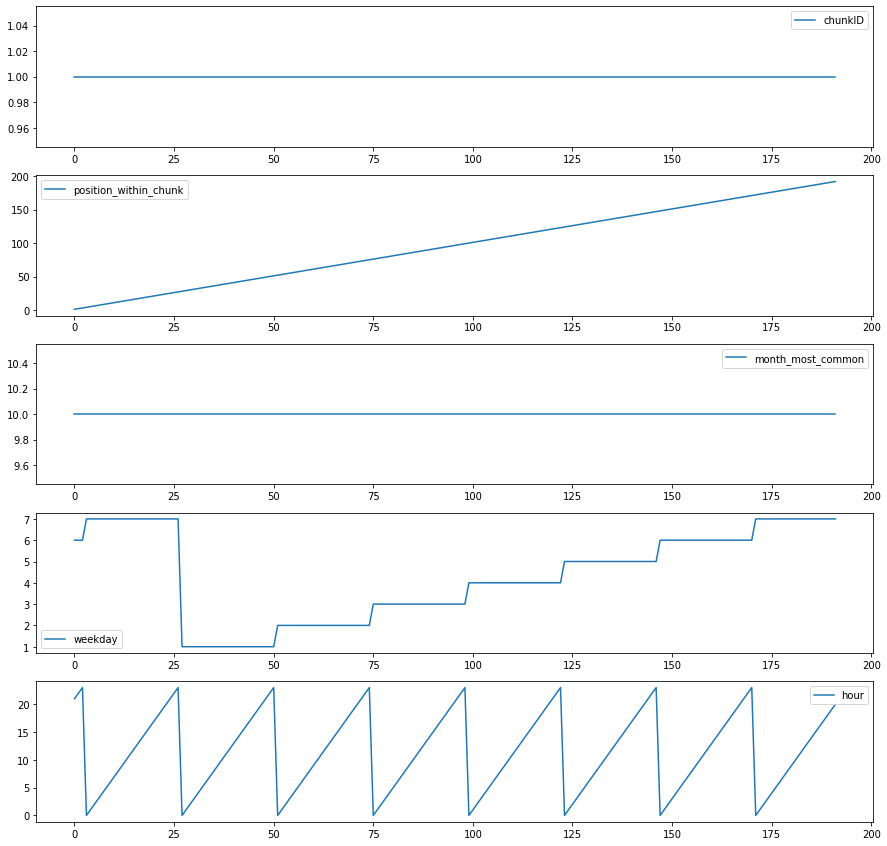

In [7]:
# plot inputs for a chunk
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# split the dataset by 'chunkID', return a dict of id to rows
def to_chunks(values, chunk_ix=0):
	chunks = dict()
	# get the unique chunk ids
	chunk_ids = unique(values[:, chunk_ix])
	# group rows by chunk id
	for chunk_id in chunk_ids:
		selection = values[:, chunk_ix] == chunk_id
		chunks[chunk_id] = values[selection, :]
	return chunks

# plot all columns for one or more chunk ids
def plot_chunk_columns(chunks, c_ids, names_columns, columnsToPlot):
  pyplot.figure(figsize = (15,15))
  for i in range(len(columnsToPlot)):
    ax = pyplot.subplot(len(columnsToPlot), 1, i+1)
    column = columnsToPlot[i]
    for chunk_id in c_ids:
      rows = chunks[chunk_id]
      pyplot.plot(rows[:,column], label=names_columns[column])
      pyplot.legend()
  pyplot.show()


name_columns = dataToWork.columns


# group data by chunks
values = dataToWork.values
chunks = to_chunks(values)
inputs = range(0, 5)
# plot inputs for some chunks
plot_chunk_columns(chunks, [1], name_columns, inputs)

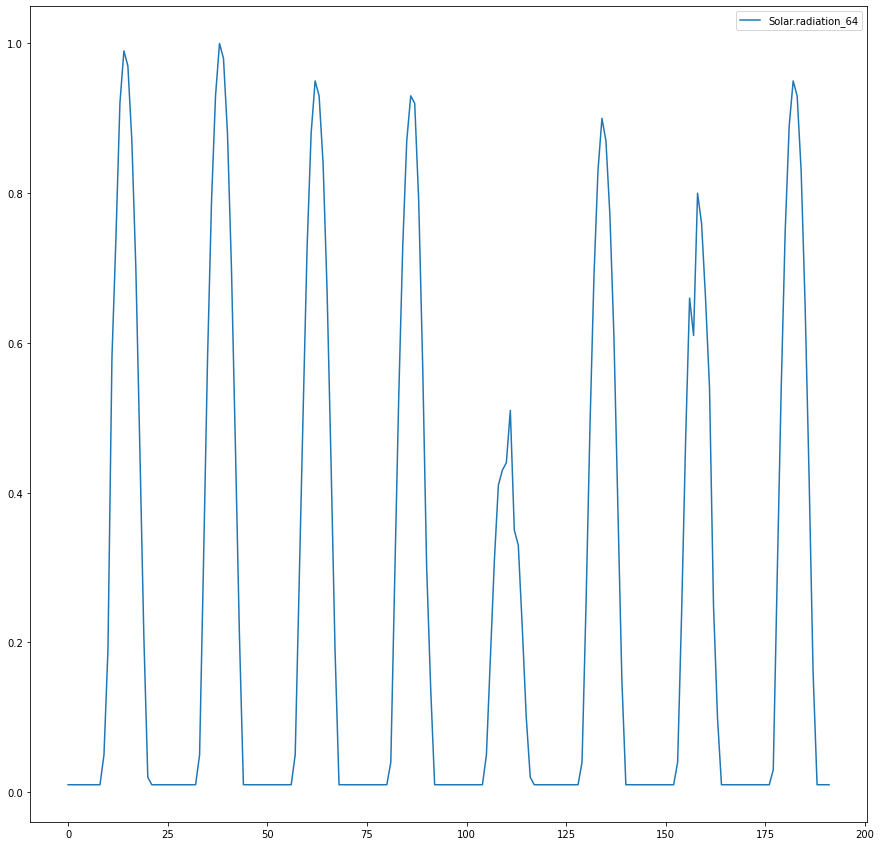

In [8]:
inputs = range(5, 6)
# plot inputs for some chunks
plot_chunk_columns(chunks, [1], name_columns, inputs)

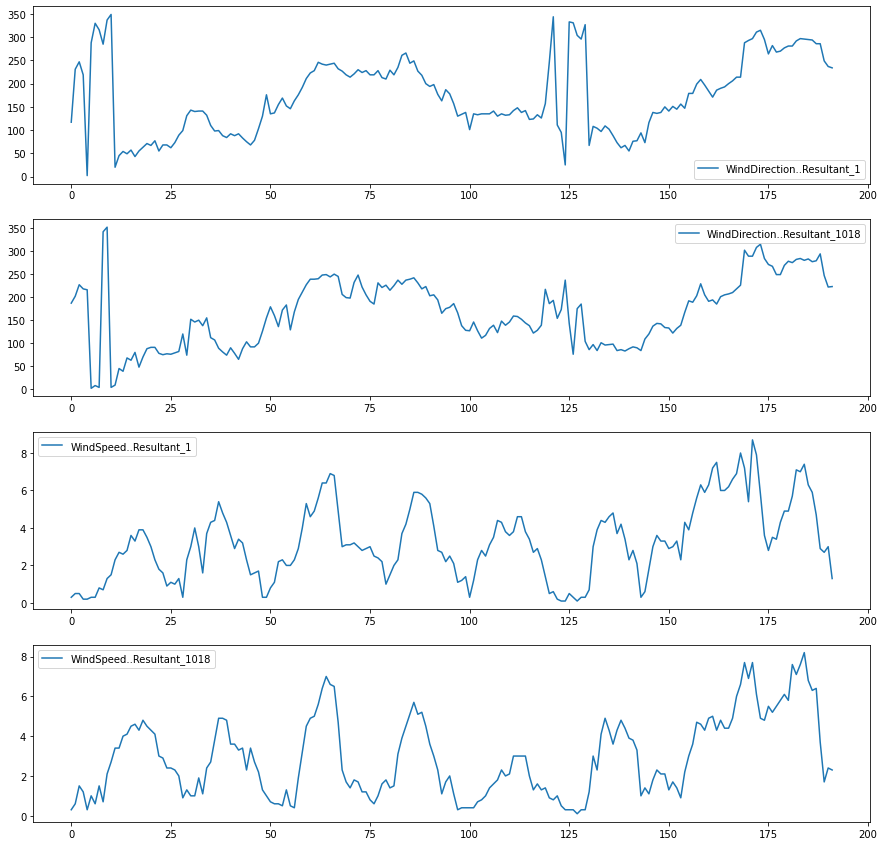

In [9]:
inputs = range(6, 10)
# plot inputs for some chunks
plot_chunk_columns(chunks, [1], name_columns, inputs)

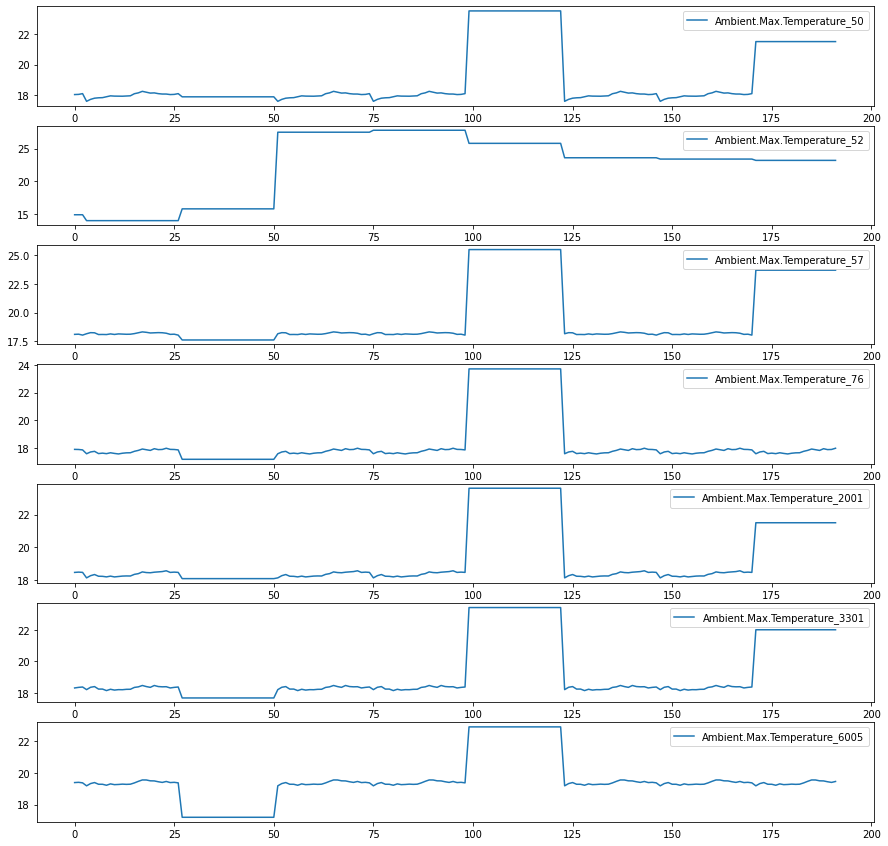

In [10]:
inputs = range(10, 17)
# plot inputs for some chunks
plot_chunk_columns(chunks, [1], name_columns, inputs)

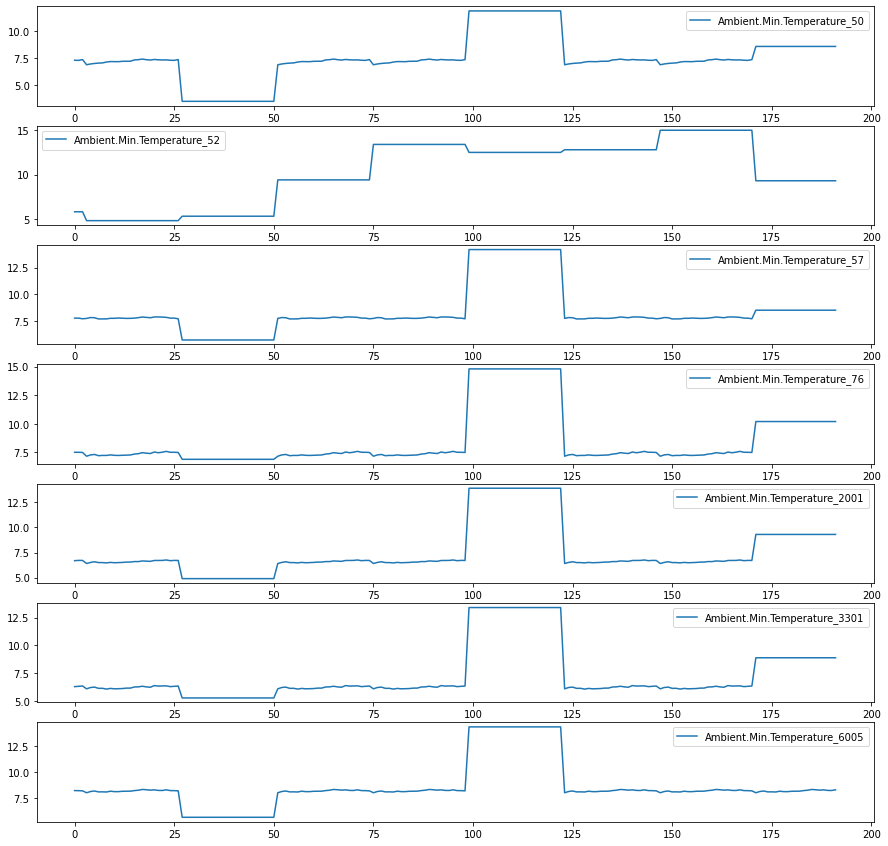

In [11]:
inputs = range(17, 24)
# plot inputs for some chunks
plot_chunk_columns(chunks, [1], name_columns, inputs)

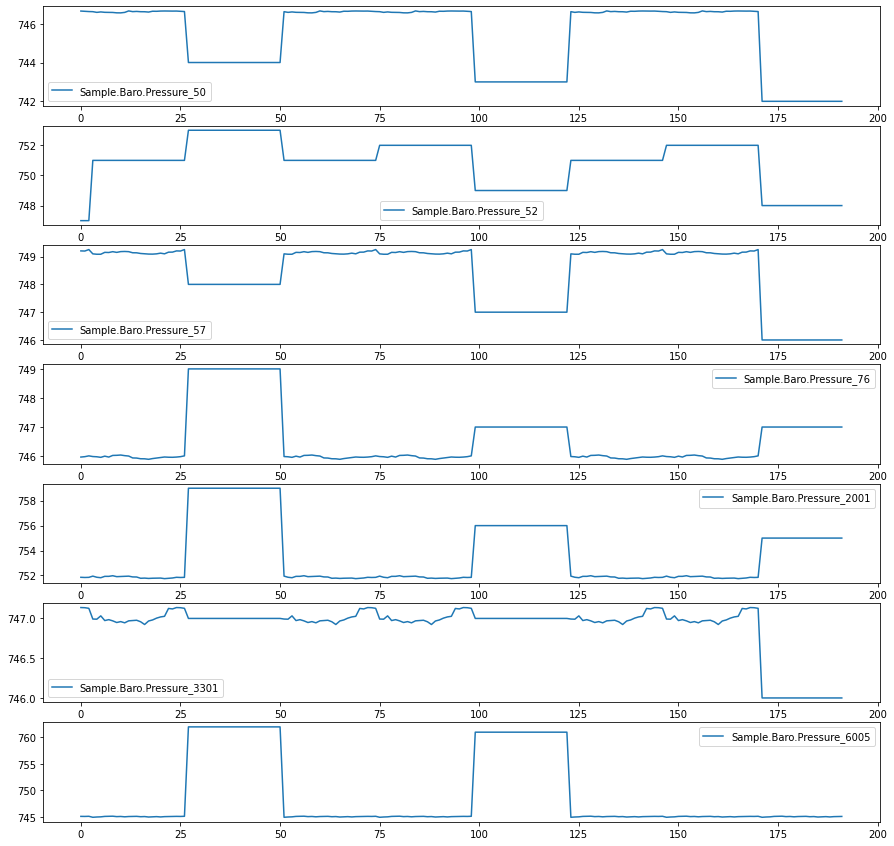

In [12]:
inputs = range(24, 31)
# plot inputs for some chunks
plot_chunk_columns(chunks, [1], name_columns, inputs)

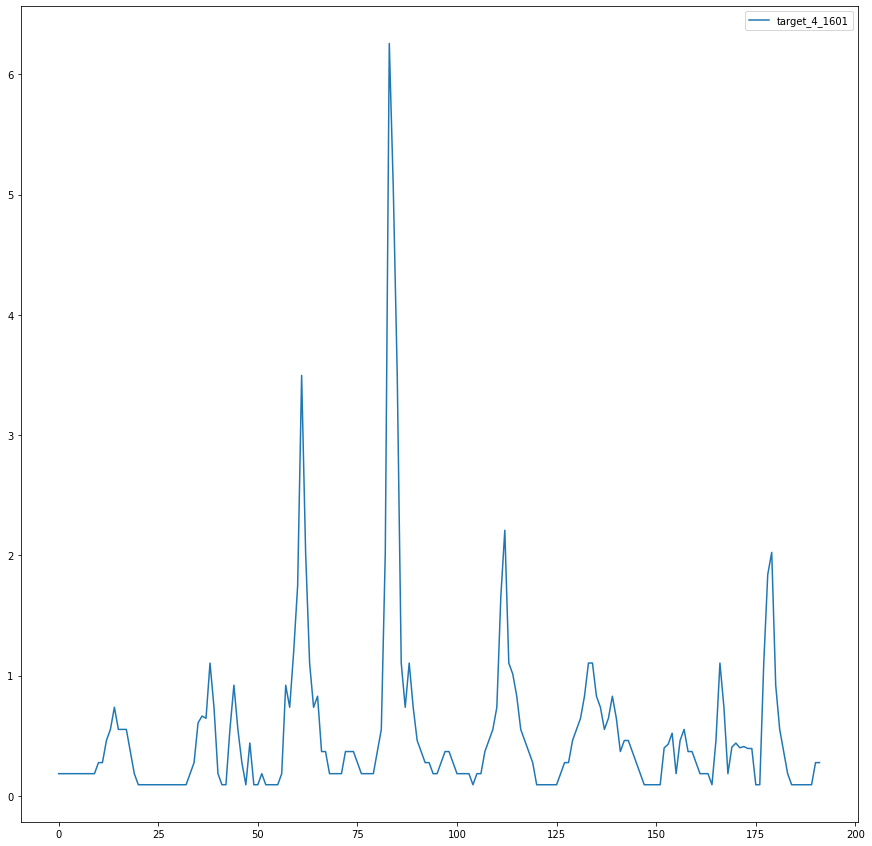

In [13]:
inputs = range(45, 46)
# plot inputs for some chunks
plot_chunk_columns(chunks, [1], name_columns, inputs)